In [110]:
%matplotlib notebook
import matplotlib.pyplot as plt
import numpy as np
from scipy.integrate import solve_ivp

def f(t,y):
    mu = 20
    f1 = y[1]
    f2 = mu*(1-y[0]**2)*y[1] - y[0]
    return np.array([f1, f2])

def Jacf(t,y):
    mu = 20
    return np.array([[0,1],[-2*y[0]*y[1]*mu-1,mu*(1-y[0]**2)]])

y0 = [2, 0]
tspan = [0, 100]
Jacf(0,y0)

array([[  0,   1],
       [ -1, -60]])

In [111]:
%%timeit
solRK23 = solve_ivp(f, tspan, y0, method='RK23')

213 ms ± 9.52 ms per loop (mean ± std. dev. of 7 runs, 1 loop each)


In [112]:
%%timeit
solBDF = solve_ivp(f, tspan, y0, method='BDF',jac=Jacf)

274 ms ± 4.43 ms per loop (mean ± std. dev. of 7 runs, 1 loop each)


In [113]:
%%timeit
solBDF = solve_ivp(f, tspan, y0, method='BDF')

293 ms ± 2.78 ms per loop (mean ± std. dev. of 7 runs, 1 loop each)


<IPython.core.display.Javascript object>


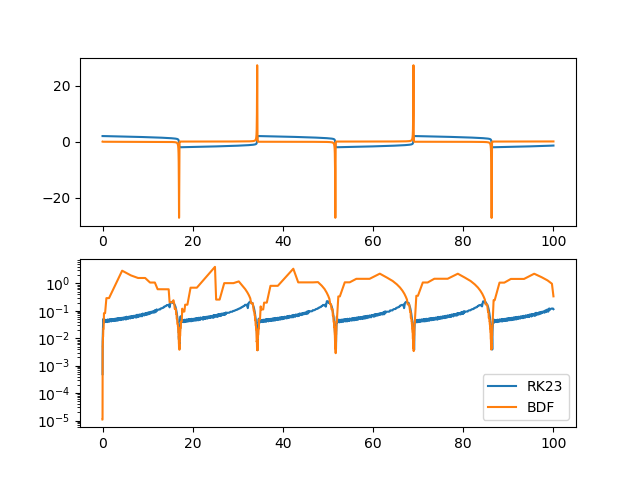

In [114]:
fig = plt.figure()

ax1 = fig.add_subplot(211)
ax2 = fig.add_subplot(212)

for i in range(solRK23.y.shape[0]):
    ax1.plot(solRK23.t, solRK23.y[i])

ax2.semilogy(solRK23.t[1:], np.diff(solRK23.t), label="RK23")
ax2.semilogy(solBDF.t[1:], np.diff(solBDF.t), label="BDF")
ax2.legend();

In [115]:
?solve_ivp